# The 2D Ising Model 


This is the IPython notebook compiled by me, Blaise Delaney (Junior Sophister Theoretical Physics, ID: 12313570), to tackle the tasks set by Dr. Thomas Archer for the course PY3C01, Trinity College, University of Dublin.

Firstly, we need to create a code cell to enable all the relevant imports. This shall be updated progressively to tacl the different sections of the problem set.

In [2]:
from __future__ import division #necessary to perform division of ints effectively cast into floats before division

import math
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand

import IsingClass #module written to carry out the required calculations (metropolis, neighbours, energy, magnetization, etc.)

#ipython, plot in notebook
%matplotlib inline 

Now, onto the random spin configuration. This can be up or down, so we shall select a grid with the following conditions: 

- spin up $\uparrow$ $=1$
- spin down $\downarrow$ $=-1$




It is probably a good idea to take a object-oriented approach. Define a class <span style="color: crimson"> Ising() </span>. This has been defined separately in the model IsingClass.py. Functions are imported accrodingly.

In [2]:
#Global parameters

N = 50 #grid dimensions
J = 1.0 #coupling in the hamiltonian
h = 0.0 #external magnetic field

The Hamiltonian is 

$$H = -J  \sum_{<i,j>}  S_i \cdot S_j - h \sum_i S_i$$

We want to investihate the behaviour of a <span style="color: crimson"> ferromagnet </span>. That is, for $J > 0$, we expect an orderly spin lattice arrangement, disrupted for temperatures equal or greater than $T_c$, the Curie temperature. In this regime, we expect paramagnetism.

Energy computations: the energy (Hamiltonian, isolated system) at of a spin site $(h = 0)$ is given by eq. (1)

$$ H_{i,j} = - J S_{i,j} \cdot (\sum_{nn} S)$$    

the Hamiltonian associated with the spin-flipped state (single spin flip dynamics are assumed to allow for a transition from a state in to another) is simple eq. (2)

$$H_{i,j} =  J S_{i,j} \cdot (\sum_{nn} S) $$

Thus, given that $\Delta E = (2) - (1)$

$$\Rightarrow \Delta E = 2 J S_{i,j}\cdot(\sum_{nn} S)$$

where is $\Delta E < 0$, flipping the spin lowers the energy of the system. Metropolis-Hastings can be then applied.


In [3]:
model = IsingClass.Ising(N,J,h) #constructor

Now run the main simulation using the class Ising( ). Allow for the system to achieve equilibrium after a given relaxation time then collect the statistics. The physical observables are obtained normalising dividing by the iterations to collect the statistics and by the total spin sites. 

Focus on the following:

- magnetization per site (absolute value)   $|<M>|$
- energy per site $E_{site}$
- susceptibility $\chi$
- specific heat capacity at constant volume $C_V$

In [6]:
steps = 3000 #steps for equilibrium
temp_steps = 25 #step size for increase in temperature [J/k]

kT = np.linspace(1.0,4.0,temp_steps) #temperature values

#arrays for future plotting
magnetization = np.zeros(temp_steps) 
Energy = np.zeros(temp_steps)
susceptibility = np.zeros(temp_steps)
specific_heat = np.zeros(temp_steps)
mag_square = np.zeros(temp_steps) 
e_square = np.zeros(temp_steps) 
binder = np.zeros(temp_steps)
mag_four = np.zeros(temp_steps)

for l in range(len(kT)):
    temperature = kT[l]
    
    #initialise observables to zero
    M = 0
    E = 0
    M_sq = 0
    E_sq = 0
    
    M_fth = 0
    
    #reset to random initial configuration
    lattice = model.spin_config()  
    
    #set out to reach equilibrium
    for t in range(steps):
        model.metropolis(lattice, temperature)

    #collect statistics allowing the system to evolve
    stat_steps = int(steps/2) 
    for k in range(stat_steps):  
        
        #model.metropolis(lattice, temperature,N,N,J,h) 
        model.metropolis(lattice, temperature)
        
        mag = model.mag_per_spin(lattice)
        mag2 = model.mag2_per_spin(lattice)
        engy = model.energy(lattice)
        engy2 = model.energy2(lattice)
        
        
        M += mag
        E += engy
        M_sq += mag2
        E_sq += engy2
        
        
        
    #observables, after equilibrium is achieved, normalised by sweeps
    magnetization[l] = abs(M)/stat_steps 
    Energy[l] = E/stat_steps 
    mag_square[l] = M_sq/stat_steps
    e_square[l] = E_sq/stat_steps
    
    
#perform manipulation directly on array instead of loop
susceptibility = (mag_square - magnetization**2)/kT
specific_heat = (e_square - Energy**2)/(kT**2)

Plot the dependence of the physical observables as a function of temperature $[\frac{J}{k_B}]$

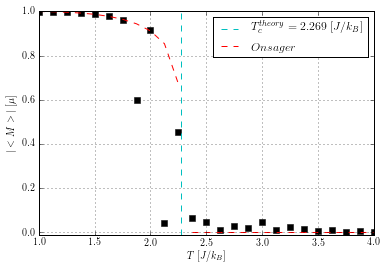

In [14]:
plt.figure()
plt.plot(kT, magnetization, 'ks')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.title("Average spin site magentization versus temperature")
plt.xlabel("$T$ $[J/k_B]$")
plt.ylabel("$|<M>|$ $[\mu]$")

if J == 1.0:
    #see if theory matches results (Onsager, 1944)
    plt.axvline(2.269, color ='c',linestyle='dashed', label="$T_c^{theory} = 2.269$ $[J/k_B]$")
    plt.legend()

plt.grid()

#plot Onsager's analytical expression
T = []
Onsager = []
T_after = []
Onsager_after = []
for l in range(len(kT)):
    if kT[l] < 2.280:
        Onsager.append((1-math.sinh(2*J/kT[l])**(-4))**(1/8))
        T.append(kT[l])
    else:
        T_after.append(kT[l])
        Onsager_after.append(0)
plt.ylim(-0.01,1)
plt.plot(T, Onsager,"r--", label = "$Onsager$")
plt.plot(T_after, Onsager_after,"r--")
plt.legend()

#plt.savefig('ma_h.eps')

plt.show()


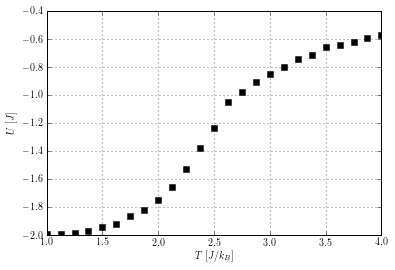

In [9]:
plt.figure()
plt.plot(kT, Energy, 'ks')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.title("Average spin site energy versus temperature")
plt.xlabel("$T$ $[J/k_B]$")
plt.ylabel("$U$ $[J]$")
plt.grid()
#plt.savefig('av_erg_black_try_square.eps')

plt.show()

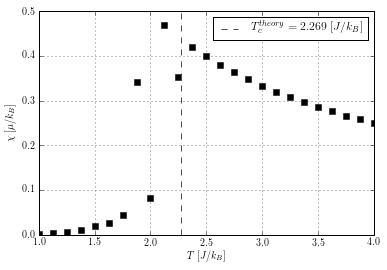

In [15]:
plt.figure()
plt.plot(kT, susceptibility, 'ks')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.title("Average susceptibility versus temperature")
plt.xlabel("$T$ $[J/k_B]$")
plt.ylabel("$\chi$ $[\mu/ k_B]$")

if J == 1.0:
    #see if theory matches results (Onsager, 1944)
    plt.axvline(2.269, color ='r',linestyle='dashed', label="$T_c^{theory} = 2.269$ $[J/k_B]$")
    plt.legend()

plt.grid()
#plt.savefig('av_suscpt_square.eps')

plt.show()

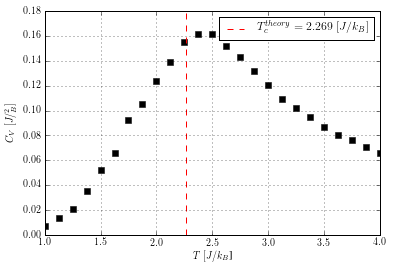

In [16]:
plt.figure()
plt.plot(kT, specific_heat, 'ks')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.title("Average specific heat versus temperature")
plt.xlabel("$T$ $[J/k_B$]")
plt.ylabel("$C_V$ $[J/_B^2]$")

if J == 1.0:
    #see if theory matches results (Onsager, 1944)
    plt.axvline(2.269, color ='r',linestyle='dashed', label="$T_c^{theory} = 2.269$ $[J/k_B]$")
    plt.legend()

plt.grid()
#plt.savefig('av_C_square.eps')

plt.show()

Initial random spin configuration


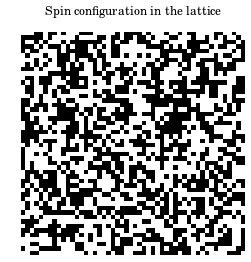

Temperature = 0.300000


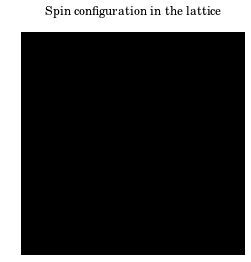

Temperature = 2.269000


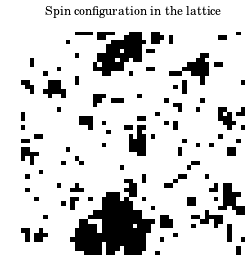

Temperature = 3.000000


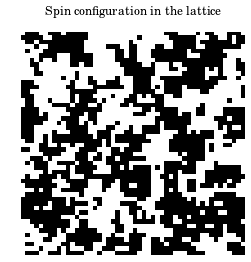

In [5]:
#show change of regime 
T = [0.3, 2.269, 3.0]  #showcase para/ferro-magnetic spin configuration

model_phase = IsingClass.Ising(50, 1.0, 0)

print "Initial random spin configuration"
lattice = model_phase.spin_config()
model_phase.lattice_plt(lattice)
for t in T:
    for q in range(801):
        
        model_phase.metropolis(lattice, t)
        
        if q == 800:
            print "Temperature = %f" %t
            model_phase.lattice_plt(lattice)   